In [ ]:
# import requried libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# load the dataset
df = pd.read_csv('../data/cleaned_df.csv', index_col = False)

In [4]:
# view first 5 rows
df.head()

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,0,3,2016-02-08 00:37:08,40.108910,-83.092860,Outerbelt E,R,Dublin,Franklin,OH,...,False,False,False,False,False,False,False,False,False,Night
1,1,2,2016-02-08 05:56:20,39.865420,-84.062800,I-70 E,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,False,False,False,Night
2,2,2,2016-02-08 06:15:39,39.102660,-84.524680,I-75 S,R,Cincinnati,Hamilton,OH,...,True,False,False,False,False,False,False,False,False,Night
3,3,2,2016-02-08 06:51:45,41.062130,-81.537840,I-77 N,R,Akron,Summit,OH,...,False,False,False,False,False,False,False,False,False,Night
4,4,3,2016-02-08 07:53:43,39.172393,-84.492792,I-75 S,R,Cincinnati,Hamilton,OH,...,False,False,False,False,False,False,False,False,False,Day


### Exploratory Data Analysis

In [5]:
# below are the columns used for exploration of data analysis used in this notebook.
columns = ['Temperature(F)',
           'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 
           'Wind_Speed(mph)', 'Precipitation(in)',
           'Amenity', 'Bump', 'Crossing']

In [6]:
#convert boolean columns to 0 and 1.
for col in columns:
    if df[col].dtypes == bool:
        df[col]=df[col].apply(lambda x: 1 if x == True else 0)

In [7]:
# Summary Statistics of the columns
for column in columns:
    print(column,'\n')
    print(df[column].describe())
    print('\n')

Temperature(F) 

count    2.731050e+06
mean     6.181444e+01
std      1.857998e+01
min     -3.300000e+01
25%      5.000000e+01
50%      6.400000e+01
75%      7.600000e+01
max      1.960000e+02
Name: Temperature(F), dtype: float64


Humidity(%) 

count    2.731050e+06
mean     6.440027e+01
std      2.285224e+01
min      1.000000e+00
25%      4.800000e+01
50%      6.700000e+01
75%      8.300000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64


Pressure(in) 

count    2.731050e+06
mean     2.947645e+01
std      1.037208e+00
min      2.000000e-02
25%      2.932000e+01
50%      2.982000e+01
75%      3.001000e+01
max      5.890000e+01
Name: Pressure(in), dtype: float64


Visibility(mi) 

count    2.731050e+06
mean     9.099739e+00
std      2.692817e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64


Wind_Speed(mph) 

count    2.731050e+06
mean     7.194677e+00
std      5.561834e+0

In [8]:
'''create a dataframe with only temperature and its value counts and
filter the dataframe so that only temperatures with more or equal to  1000 accidents are included.'''
temp = df['Temperature(F)'].value_counts().reset_index()
temp.columns = ['Temperature(F)','Accident Cases']
temp = temp[temp['Accident Cases']>=1000]
temp.head(2)

,Temperature(F),Accident Cases
0,73.0,63486
1,77.0,62442


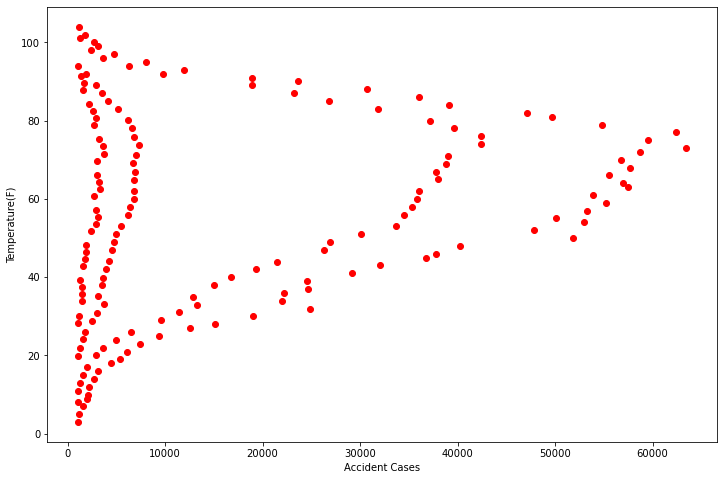

In [9]:
# scatterplot with temperature and accident cases
plt.figure(figsize= (12,8))
plt.scatter(x= temp['Accident Cases'], y = temp['Temperature(F)'],color ='red')
plt.xlabel('Accident Cases')
plt.ylabel('Temperature(F)')
plt.show();

**Interpretation**  
Maximum accident cases had the temperature ranging from 40 - 80 degree Fahreheit.

In [10]:
'''create a dataframe with  humidity and it value counts and
filter the dataframe so that only humidity with more than 500 accidents are included.'''
humi = df['Humidity(%)'].value_counts().reset_index()
humi.columns = ['Humidity(%)','Accident Cases']
humi = humi[humi['Accident Cases']>500]
humi.head(2)

,Humidity(%),Accident Cases
0,93.0,102097
1,100.0,94865


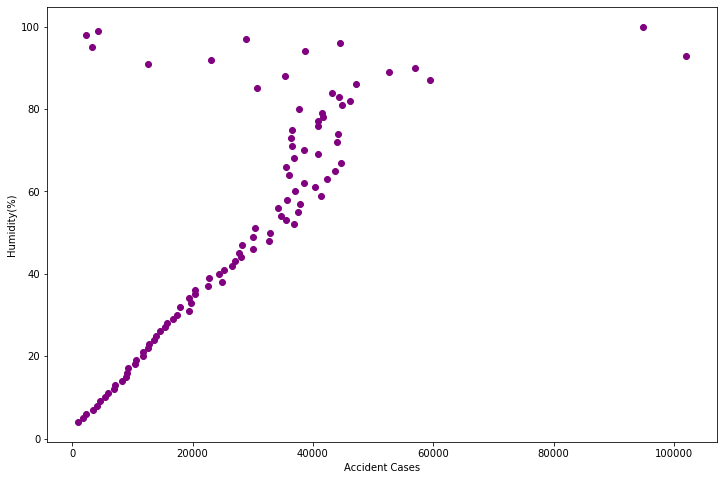

In [11]:
# scatterplot with humidity and accident cases
plt.figure(figsize= (12,8))
plt.scatter(x= humi['Accident Cases'], y = humi['Humidity(%)'],color = 'purple')
plt.xlabel('Accident Cases')
plt.ylabel('Humidity(%)')
plt.show();

**Findings**  
Majority of accident cases had humidity of 0 to 40%.

In [12]:
'''create a dataframe with pressure, its value counts and
filter the dataframe so that only pressure with more than 1000 accidents are included.'''
pressure = df['Pressure(in)'].value_counts().reset_index()
pressure.columns = ['Pressure(in)','Accident Cases']
pressure = pressure[pressure['Accident Cases']>=1000]

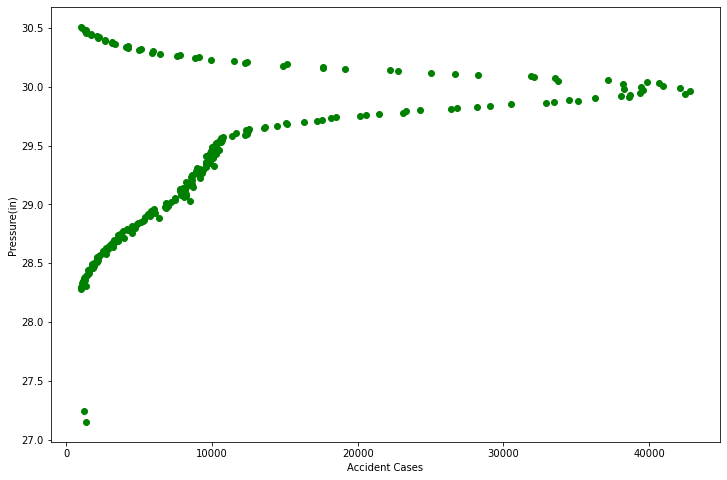

In [13]:
# scatterplot with humidity and accident cases
plt.figure(figsize= (12,8))
plt.scatter(x= pressure['Accident Cases'], y = pressure['Pressure(in)'],color = 'green')
plt.xlabel('Accident Cases')
plt.ylabel('Pressure(in)')
plt.show();

**Interpretation**  
Maximum accidents which were reported had the air pressure between 28.3 - 29.5 in inches.

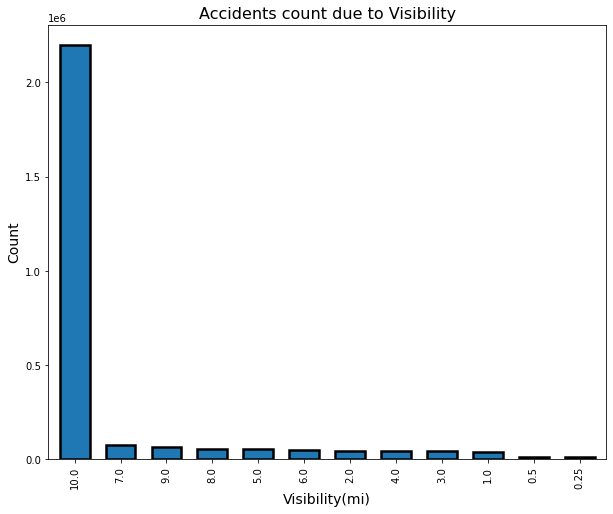

In [14]:
# create bar plot for Visibility with top 10 occurences. 
fig= plt.gcf()
fig.set_size_inches(10, 8);
df['Visibility(mi)'].value_counts().sort_values(ascending=False).head(12).plot.bar(width=0.65,edgecolor='k',align='center',linewidth=2.5)
plt.xlabel('Visibility(mi)',fontsize=14)
plt.ylabel('Count',fontsize= 14)
plt.title('Accidents count due to Visibility',fontsize=16)
plt.show();

**Findings**  
Above bar plot seems unique in terms of mile visibility. The top most frequent mile visibility was 10 miles.

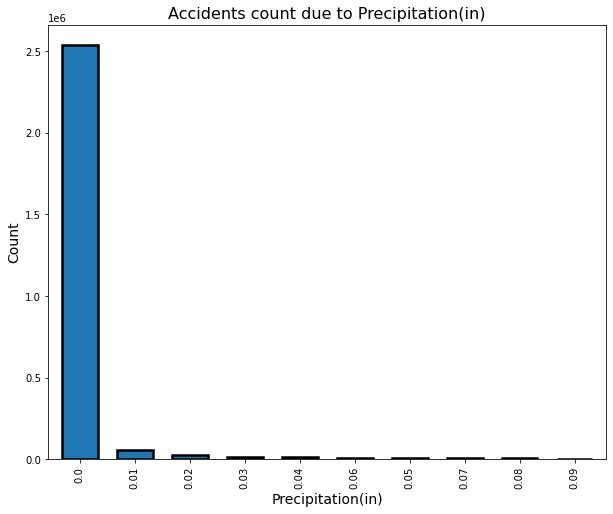

In [15]:
# create bar plot for precipitation with top 10 values 
fig= plt.gcf()
fig.set_size_inches(10, 8);
df['Precipitation(in)'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.65,edgecolor='k',align='center',linewidth=2.5)
plt.xlabel('Precipitation(in)',fontsize=14)
plt.ylabel('Count',fontsize= 14)
plt.title('Accidents count due to Precipitation(in)',fontsize=16)
plt.show();

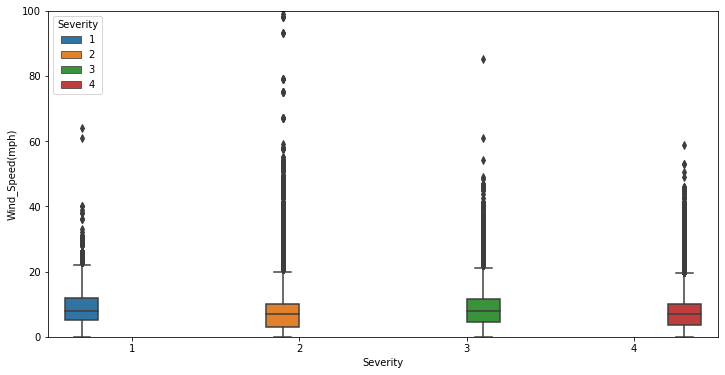

In [16]:
# create wind speed box plot with severity of the accident.
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity',y='Wind_Speed(mph)',data=df,hue='Severity')
plt.ylim(0,100);

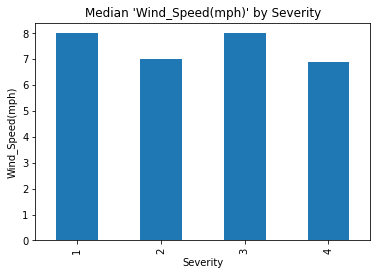

In [36]:
# wind speed has many outlier so used median since mean could skew the data.
df.groupby('Severity')['Wind_Speed(mph)'].median().plot(kind='bar')
plt.ylabel('Wind_Speed(mph)')
plt.title("Median 'Wind_Speed(mph)' by Severity")
plt.show()

**Findings**  
Wind Speed didnt affect the Severity of accident as shown by above bar plot. 

Text(0.5, 1.0, 'Crossing proportion with accident severity')

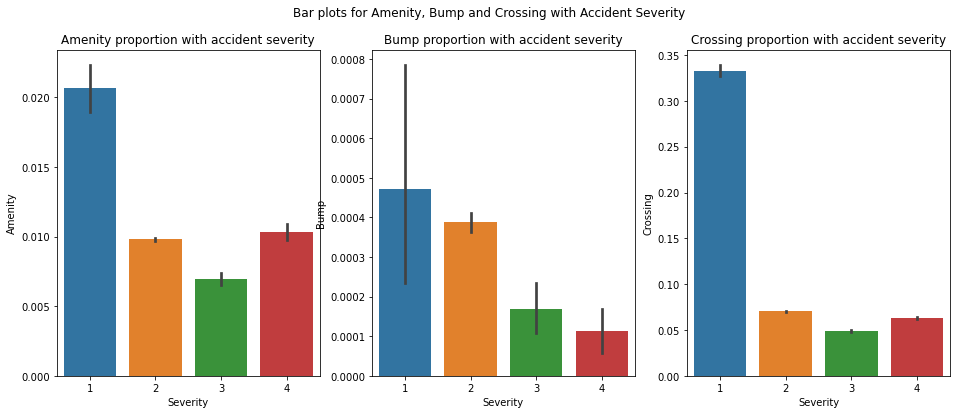

In [35]:
# bar plot for Amenity, Bump and Crossing with Accident Severity Occurences.
fig, ax = plt.subplots(1,3, figsize= (16,6))
fig.suptitle('Bar plots for Amenity, Bump and Crossing with Accident Severity')
sns.barplot(ax=ax[0],x='Severity',y='Amenity',data=df);
ax[0].set_title('Amenity proportion with accident severity')
sns.barplot(ax=ax[1],x='Severity',y='Bump',data=df)
ax[1].set_title('Bump proportion with accident severity')
sns.barplot(ax=ax[2],x='Severity',y='Crossing',data=df)
ax[2].set_title('Crossing proportion with accident severity')

**Findings**
- The y-axis shows the proportion of accidents with a given severity that have an amenity, bump or crossing present.
    - Presence of Amenity in nearby location  show the accident severity of 1 majority of accident cases, but was condusive to accident severity 4.
    - If there was presence of speed bump or Bump nearby the accident location there majority of cases had minor accidents.
    - Majority of accidents where there was a presence of crossing had severity of 1, followed by 2,3 and 4. Meaning, crossing did have postive effect on accident severity

